# <font color='#3e9dbf'>Import Library and Dataset</font>

In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import itertools

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

from sklearn.ensemble import RandomForestClassifier

In [81]:
url = "../iris.data"
columns_name = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species']
dataset = pd.read_csv(url, names=columns_name, sep=',', na_values='?', skipinitialspace =True)

# dataset.head(len(dataset))

# <font color='#3e9dbf'>Function</font>

## <font color='#e89c9a'><ul><li>Plot Decision Tree</li></ul></font>

In [82]:
def plot_decision_tree(model, feature_names, class_names, size=(40, 15)):
  # กำหนดสีของแต่ละคลาส
  class_colors = {
    'Iris-setosa': '#e9c7c6',
    'Iris-versicolor': '#9fc3d0',
    'Iris-virginica': '#c6e9c7'
  }

  # สร้าง colormap จากสีของแต่ละคลาส
  cmap = mcolors.ListedColormap([class_colors[c] for c in class_names])

  plt.figure(figsize=size)
  plot_tree(model, feature_names=feature_names, class_names=class_names, filled=True, rounded=True, impurity=False, proportion=True, fontsize=18)

  # ปรับสีของโหนด
  ax = plt.gca()
  for i, t in enumerate(ax.get_children()):
    if isinstance(t, plt.Text):
      for cls, color in class_colors.items():
        if cls in t.get_text():
          t.set_bbox(dict(facecolor=color, edgecolor='black', boxstyle='round,pad=0.3'))

  plt.show()

## <font color='#e89c9a'><ul><li>Confusion Matrix</li></ul></font>

In [83]:
def plot_confusion_matrix(cm, classes, title, type):
  cmap = plt.cm.Blues if type == 'Test' else plt.cm.Oranges

  plt.figure(figsize=(10, 10))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title, size=16, pad=22)
  plt.colorbar(aspect=4)
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, size=18)
  plt.yticks(tick_marks, classes, size=18)

  thresh = cm.max() / 2.

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'), fontsize=30, horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

  plt.gca().set_facecolor('none')
  plt.grid(None)
  plt.tight_layout()
  plt.ylabel('Actual', size=16)
  plt.xlabel('Predicted', size=16, labelpad=20)

  plt.show()

# <font color='#3e9dbf'>Spilt Train and Test Data</font>

In [84]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# <font color='#3e9dbf'>Decision Tree Classifier</font>

## <font color='#e89c9a'><ul><li>Train Model with Default parameter</li></ul></font>

In [85]:
title = 'Default parameters'
model = DecisionTreeClassifier()
model = model.fit(X_train, y_train)

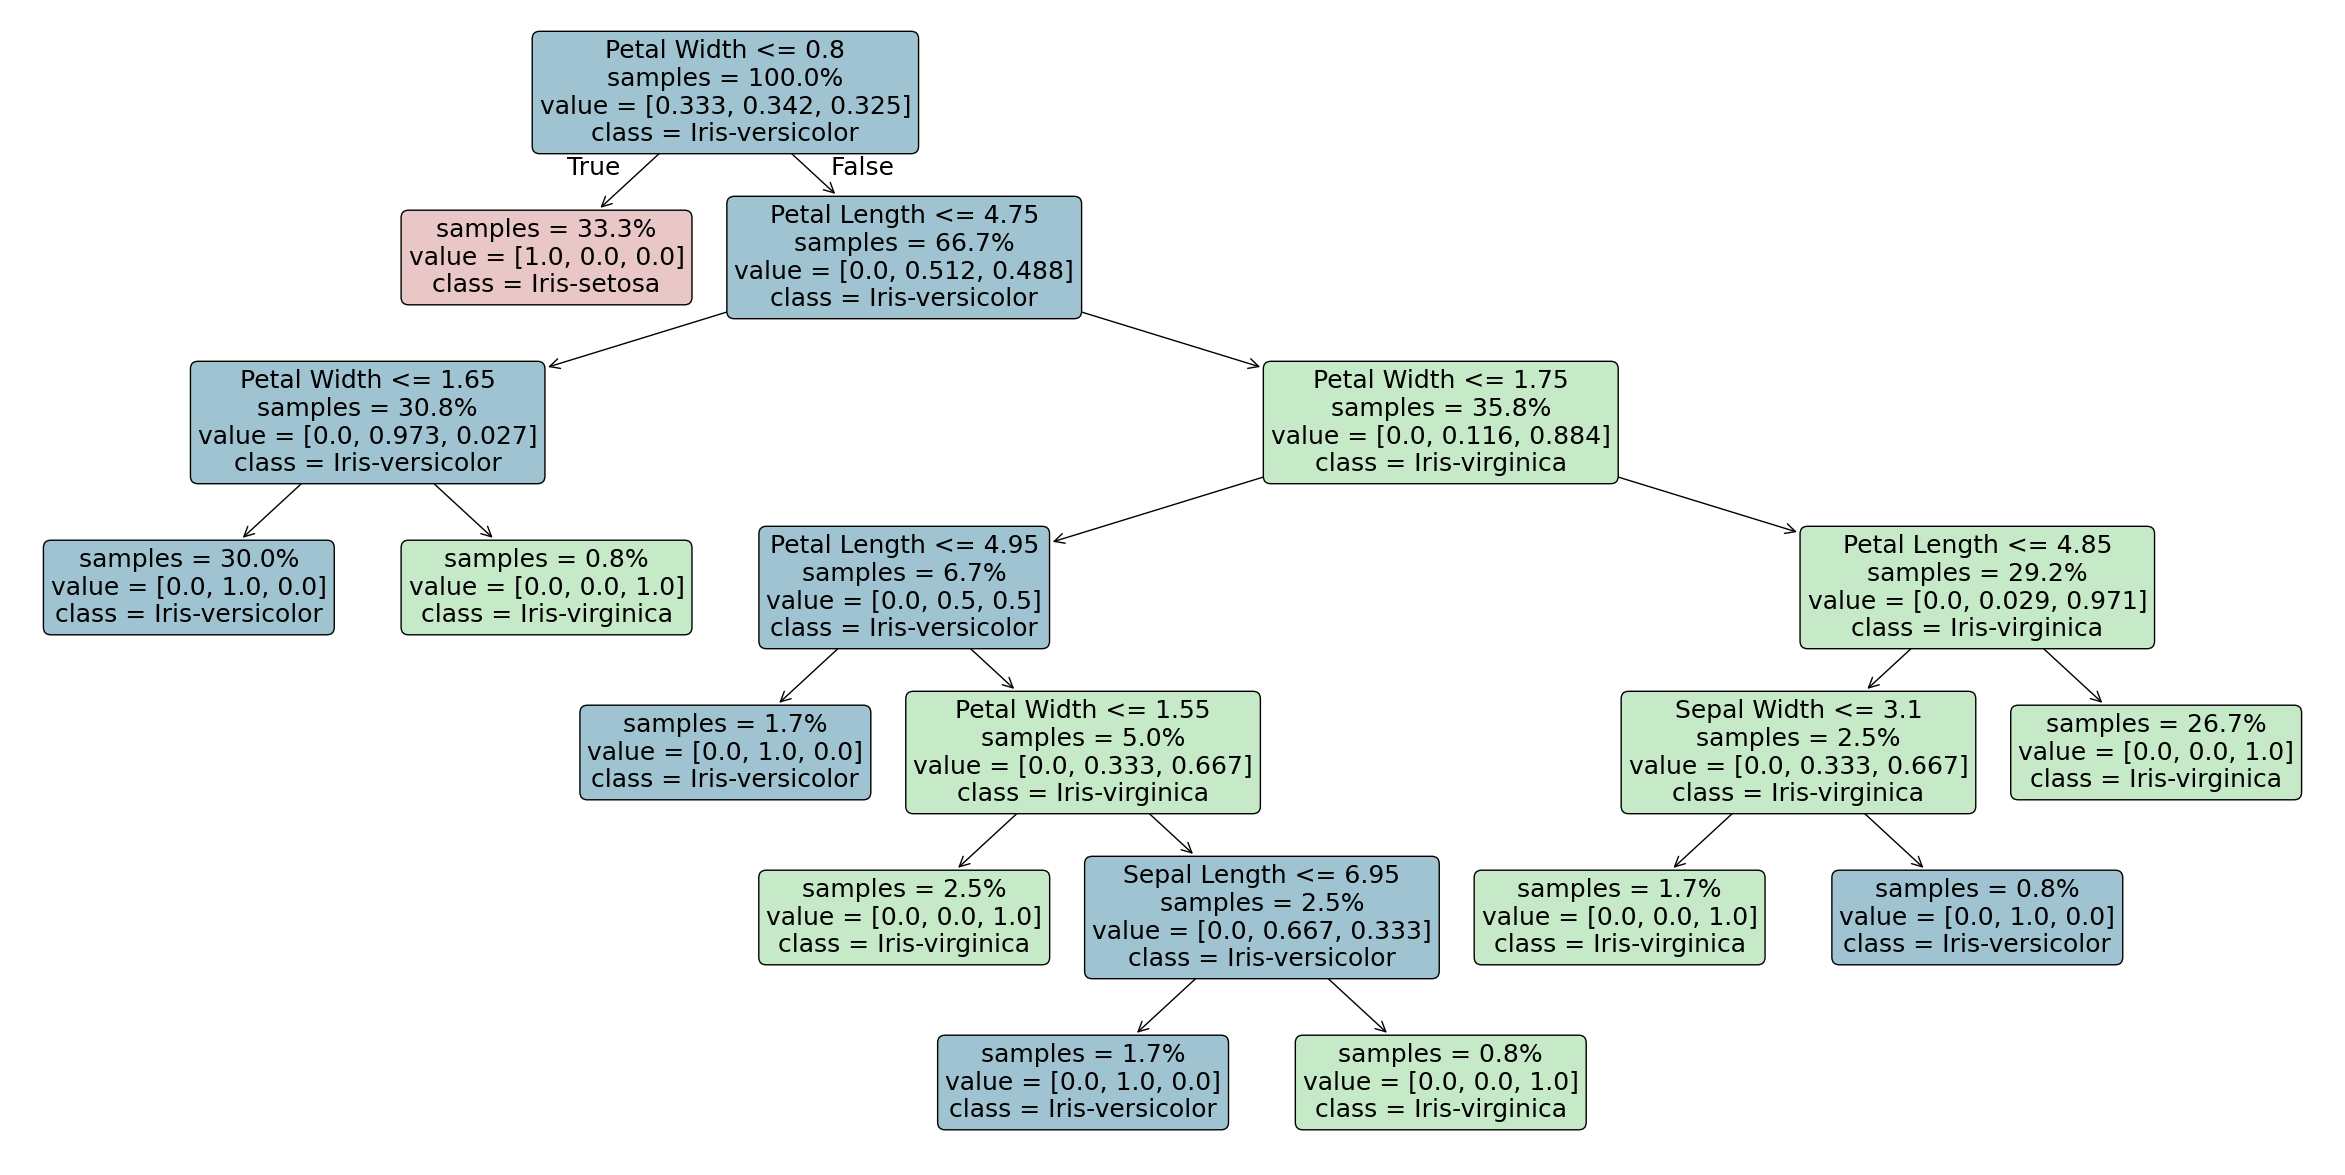

In [86]:
plot_decision_tree(model, columns_name[:-1], model.classes_, size=(30, 15))

### <font color='#9ae89c'><ul style="list-style-type:circle;"><li>Train</li></ul></font>

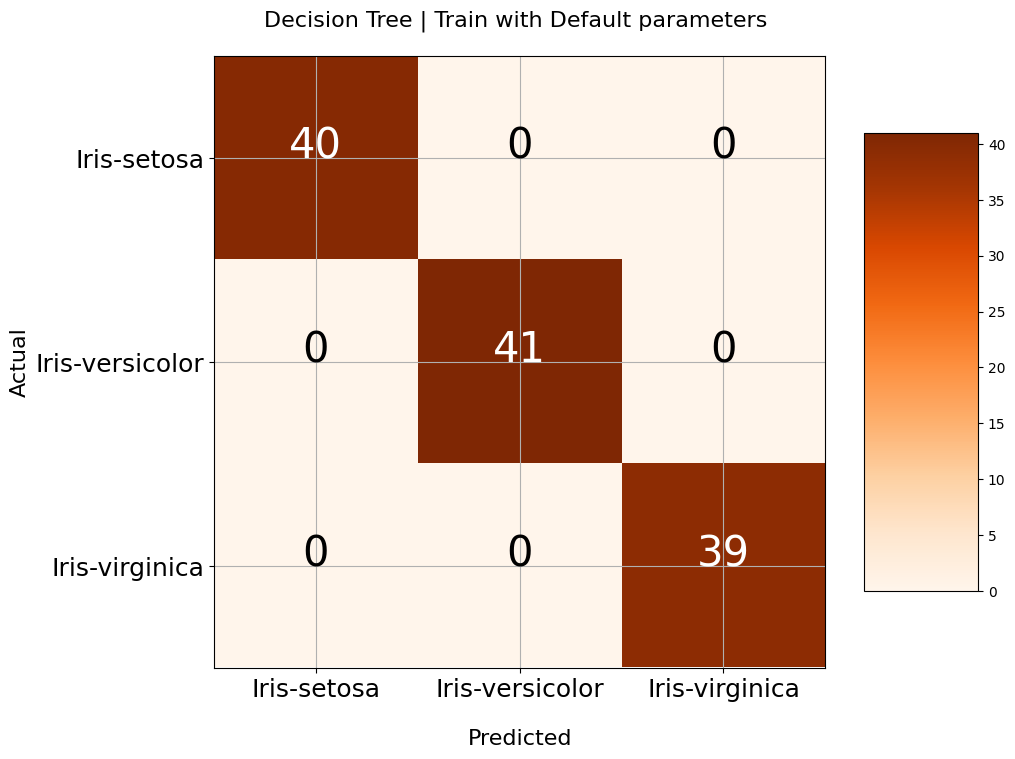

Accuracy: 100.00%


In [87]:
y_pred = model.predict(X_train)

plot_confusion_matrix(confusion_matrix(y_train, y_pred), classes=model.classes_, title=f"Decision Tree | Train with {title} ", type='Train')
print(f"Accuracy: {accuracy_score(y_train, y_pred) * 100:.2f}%")

### <font color='#9ae89c'><ul style="list-style-type:circle;"><li>Test</li></ul></font>

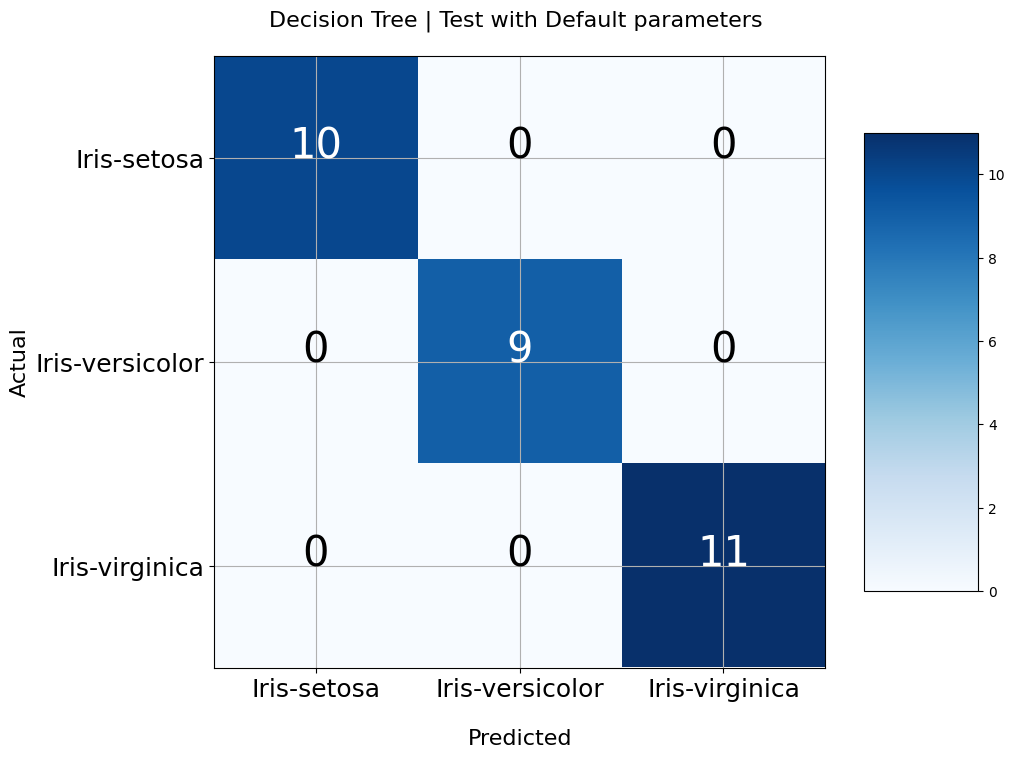

Accuracy: 100.00%


In [88]:
y_pred = model.predict(X_test)

plot_confusion_matrix(confusion_matrix(y_test, y_pred), classes=model.classes_, title=f"Decision Tree | Test with {title} ", type='Test')
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

## <font color='#e89c9a'><ul><li>Train Model with max_leaf_nodes=3</li></ul></font>

In [89]:
title = 'max_leaf_nodes = 3'
model = DecisionTreeClassifier(max_leaf_nodes=3, random_state=42)
model = model.fit(X_train, y_train)

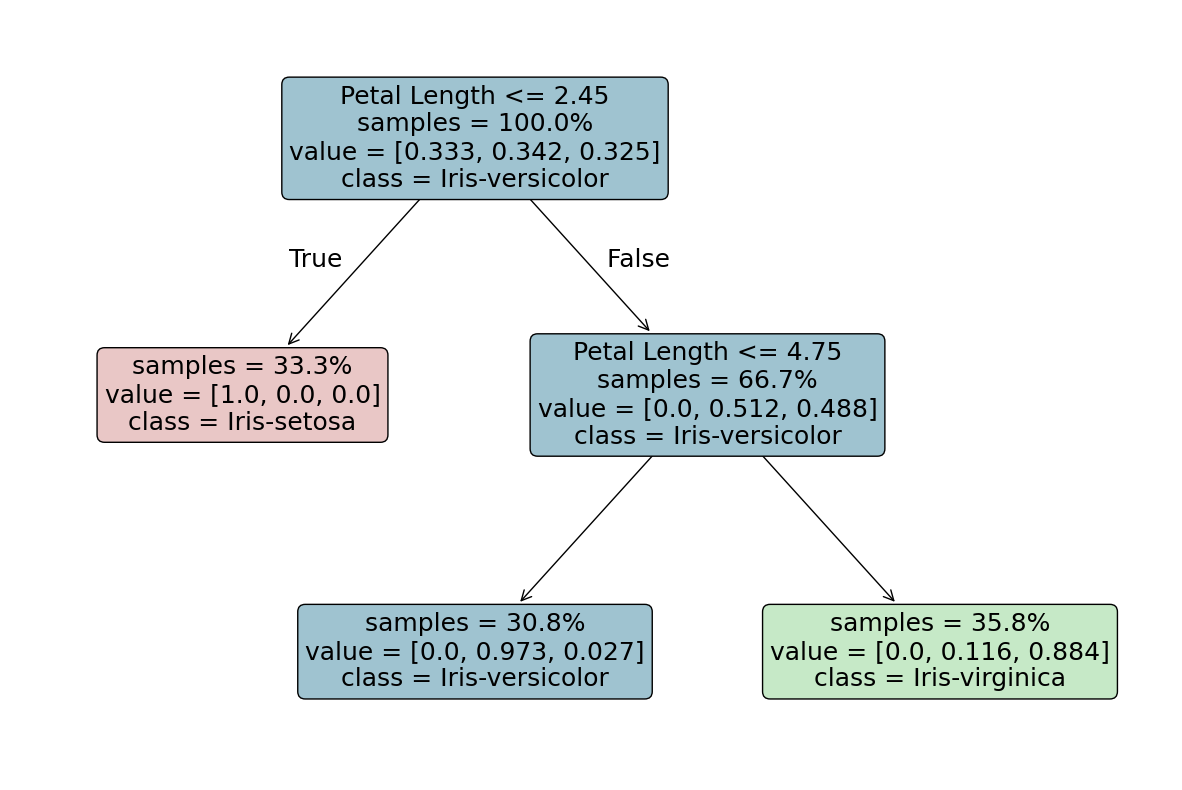

In [90]:
plot_decision_tree(model, columns_name[:-1], model.classes_, size=(15, 10))

### <font color='#9ae89c'><ul style="list-style-type:circle;"><li>Train</li></ul></font>

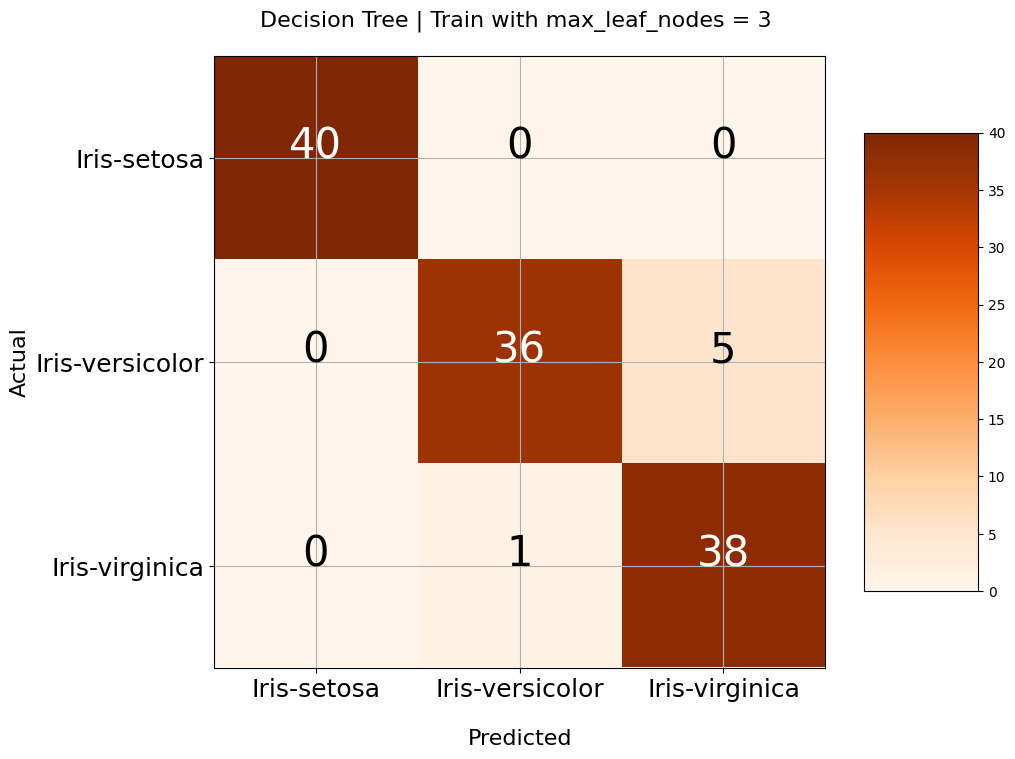

Accuracy: 95.00%


In [91]:
y_pred = model.predict(X_train)

plot_confusion_matrix(confusion_matrix(y_train, y_pred), classes=model.classes_, title=f"Decision Tree | Train with {title} ", type='Train')
print(f"Accuracy: {accuracy_score(y_train, y_pred) * 100:.2f}%")

### <font color='#9ae89c'><ul style="list-style-type:circle;"><li>Test</li></ul></font>

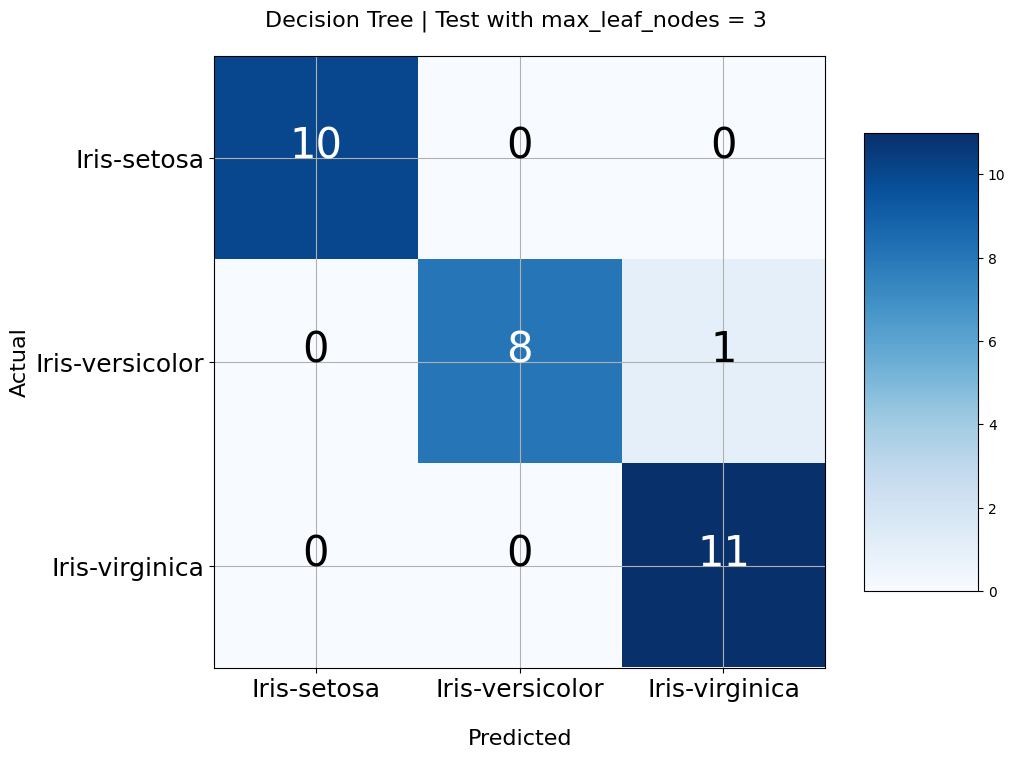

Accuracy: 96.67%


In [92]:
y_pred = model.predict(X_test)

plot_confusion_matrix(confusion_matrix(y_test, y_pred), classes=model.classes_, title=f"Decision Tree | Test with {title} ", type='Test')
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

## <font color='#e89c9a'><ul><li>Train Model with max_depth = 3</li></ul></font>

In [93]:
title = 'splitter = random'
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model = model.fit(X_train, y_train)

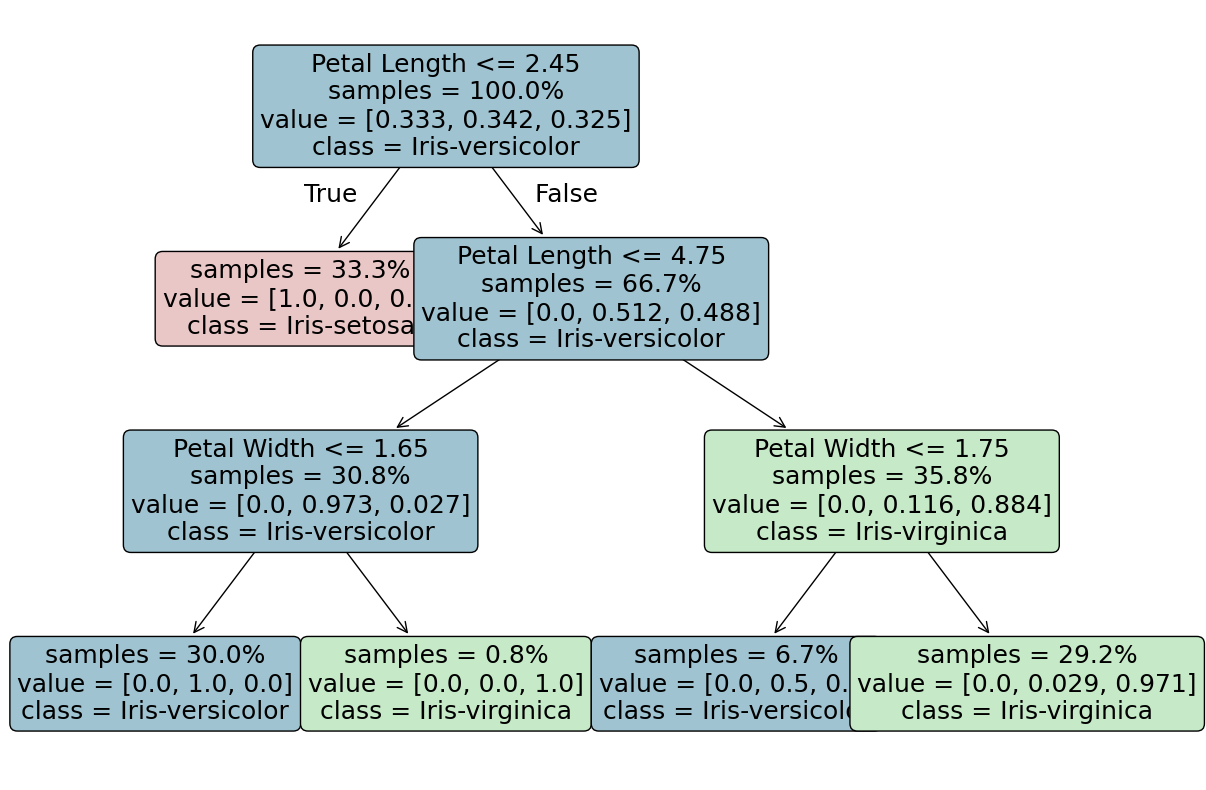

In [94]:
plot_decision_tree(model, columns_name[:-1], model.classes_, size=(15, 10))

### <font color='#9ae89c'><ul style="list-style-type:circle;"><li>Train</li></ul></font>

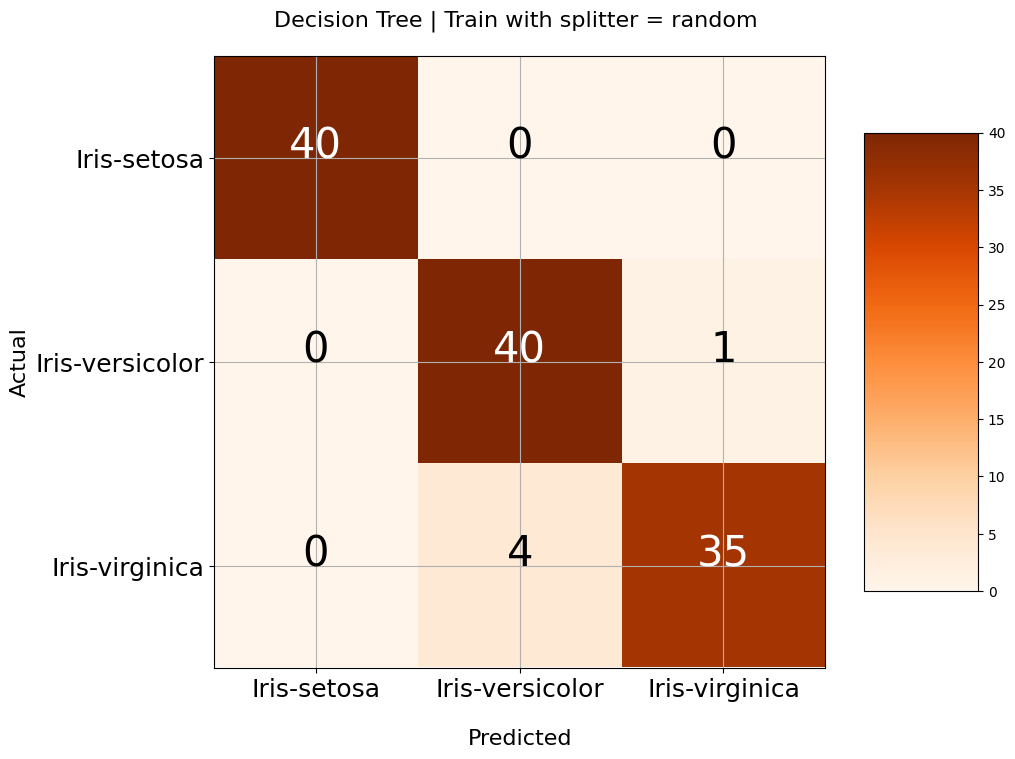

Accuracy: 95.83%


In [95]:
y_pred = model.predict(X_train)

plot_confusion_matrix(confusion_matrix(y_train, y_pred), classes=model.classes_, title=f"Decision Tree | Train with {title} ", type='Train')
print(f"Accuracy: {accuracy_score(y_train, y_pred) * 100:.2f}%")

### <font color='#9ae89c'><ul style="list-style-type:circle;"><li>Test</li></ul></font>

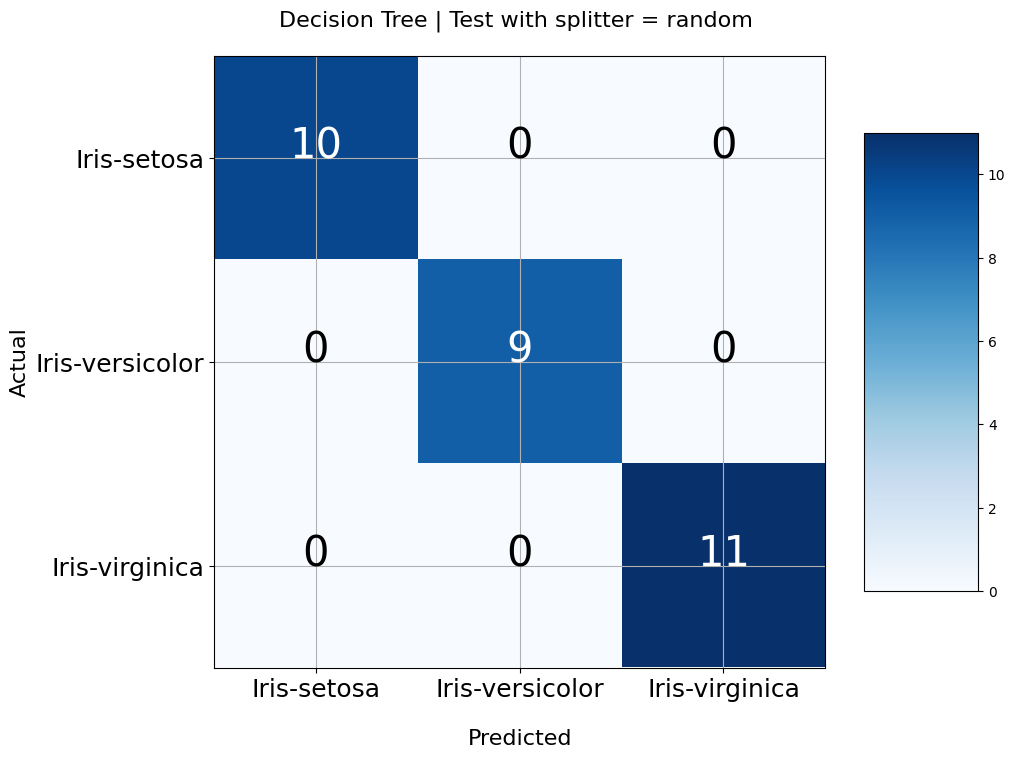

Accuracy: 100.00%


In [96]:
y_pred = model.predict(X_test)

plot_confusion_matrix(confusion_matrix(y_test, y_pred), classes=model.classes_, title=f"Decision Tree | Test with {title} ", type='Test')
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

# <font color='#3e9dbf'>Random Forest Classifier</font>

## <font color='#e89c9a'><ul><li>Train Model with Default parameter</li></ul></font>

In [97]:
title = 'Default parameters'
model = RandomForestClassifier()
model = model.fit(X_train, y_train)

### <font color='#9ae89c'><ul style="list-style-type:circle;"><li>Train</li></ul></font>

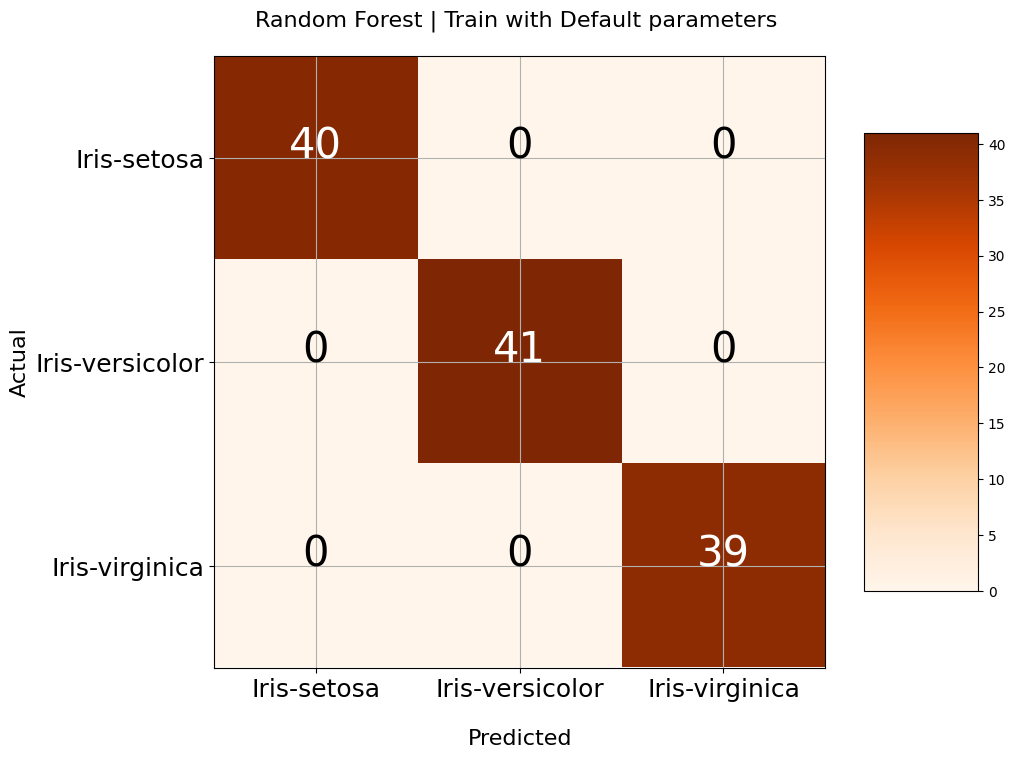

Accuracy: 100.00%


In [98]:
y_pred = model.predict(X_train)

plot_confusion_matrix(confusion_matrix(y_train, y_pred), classes=model.classes_, title=f"Random Forest | Train with {title} ", type='Train')
print(f"Accuracy: {accuracy_score(y_train, y_pred) * 100:.2f}%")

### <font color='#9ae89c'><ul style="list-style-type:circle;"><li>Test</li></ul></font>

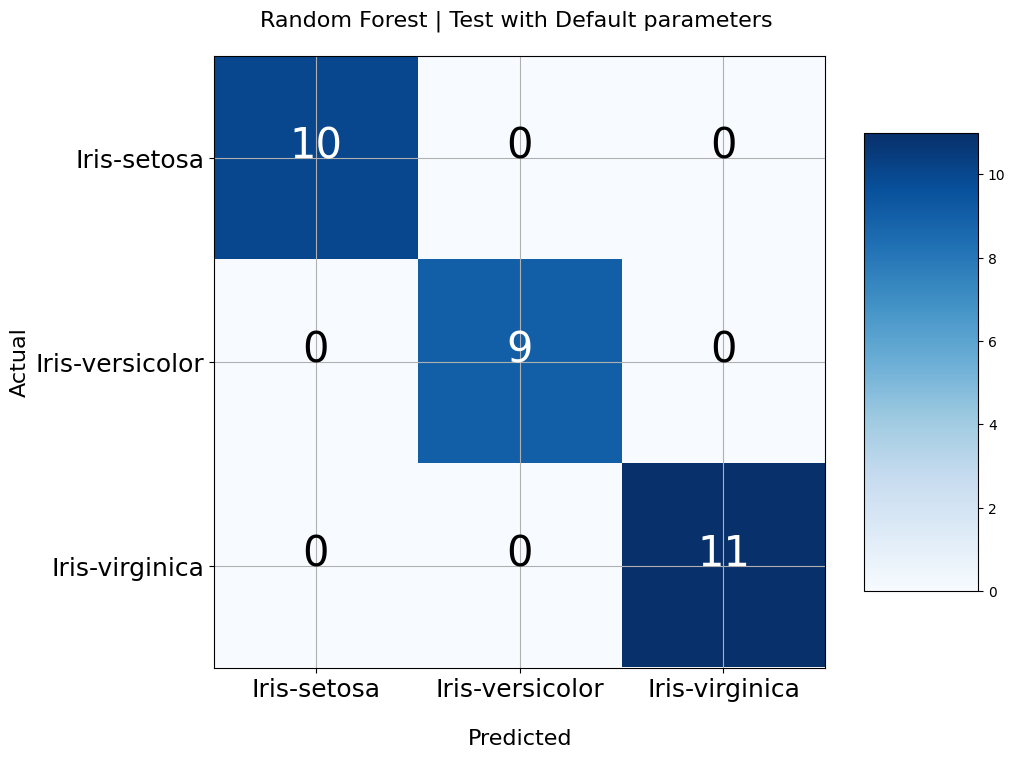

Accuracy: 100.00%


In [99]:
y_pred = model.predict(X_test)

plot_confusion_matrix(confusion_matrix(y_test, y_pred), classes=model.classes_, title=f"Random Forest | Test with {title} ", type='Test')
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

## <font color='#e89c9a'><ul><li>Train Model with max_leaf_nodes = 3</li></ul></font>

In [100]:
title = 'max_leaf_nodes = 3'
model = RandomForestClassifier(max_leaf_nodes=3, random_state=42)
model = model.fit(X_train, y_train)

### <font color='#9ae89c'><ul style="list-style-type:circle;"><li>Train</li></ul></font>

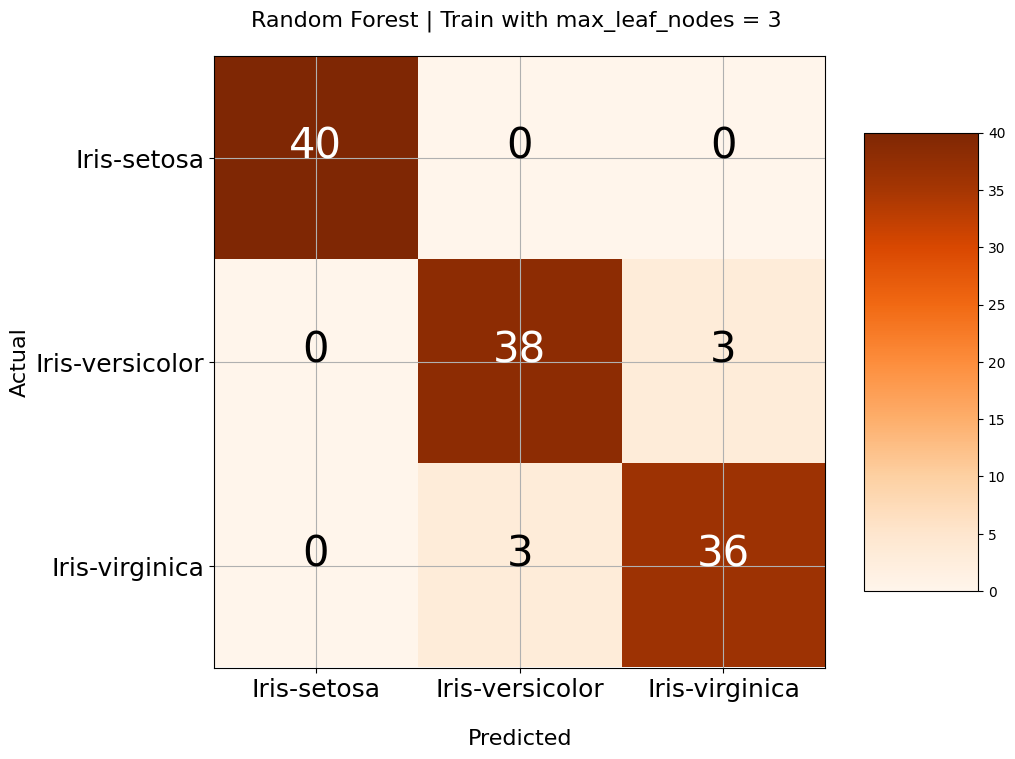

Accuracy: 95.00%


In [101]:
y_pred = model.predict(X_train)

plot_confusion_matrix(confusion_matrix(y_train, y_pred), classes=model.classes_, title=f"Random Forest | Train with {title} ", type='Train')
print(f"Accuracy: {accuracy_score(y_train, y_pred) * 100:.2f}%")

### <font color='#9ae89c'><ul style="list-style-type:circle;"><li>Test</li></ul></font>

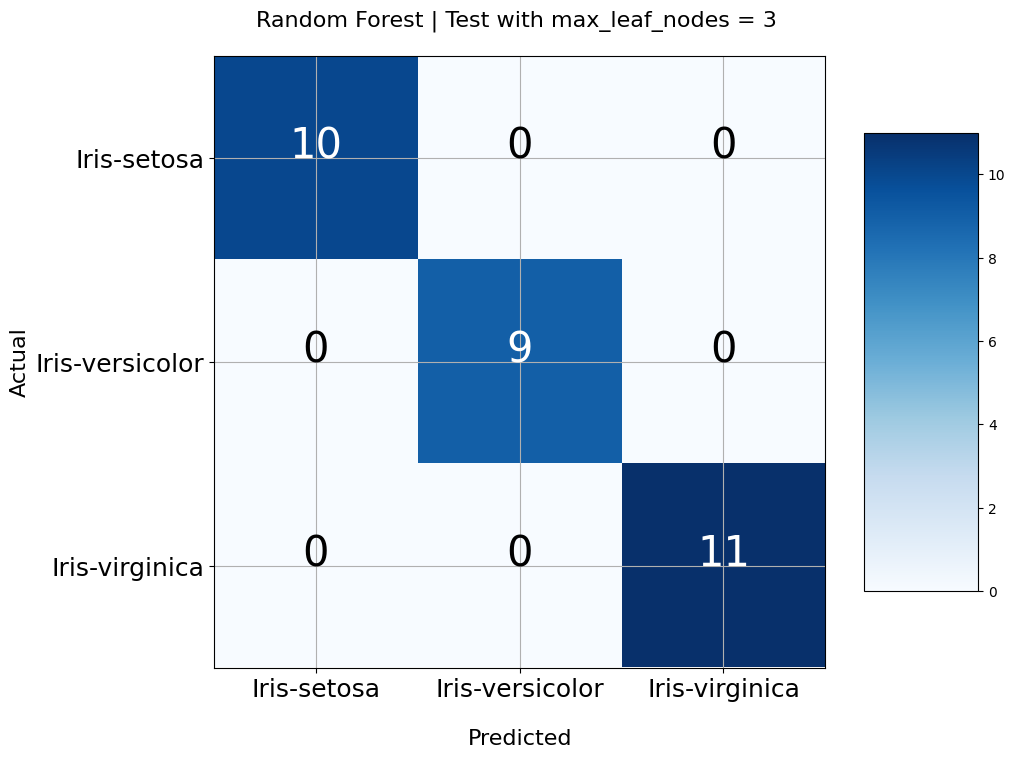

Accuracy: 100.00%


In [102]:
y_pred = model.predict(X_test)

plot_confusion_matrix(confusion_matrix(y_test, y_pred), classes=model.classes_, title=f"Random Forest | Test with {title} ", type='Test')
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

## <font color='#e89c9a'><ul><li>Train Model with max_depth = 3</li></ul></font>

In [103]:
title = 'max_depth = 3'
model = RandomForestClassifier(max_depth=3, random_state=42)
model = model.fit(X_train, y_train)

### <font color='#9ae89c'><ul style="list-style-type:circle;"><li>Train</li></ul></font>

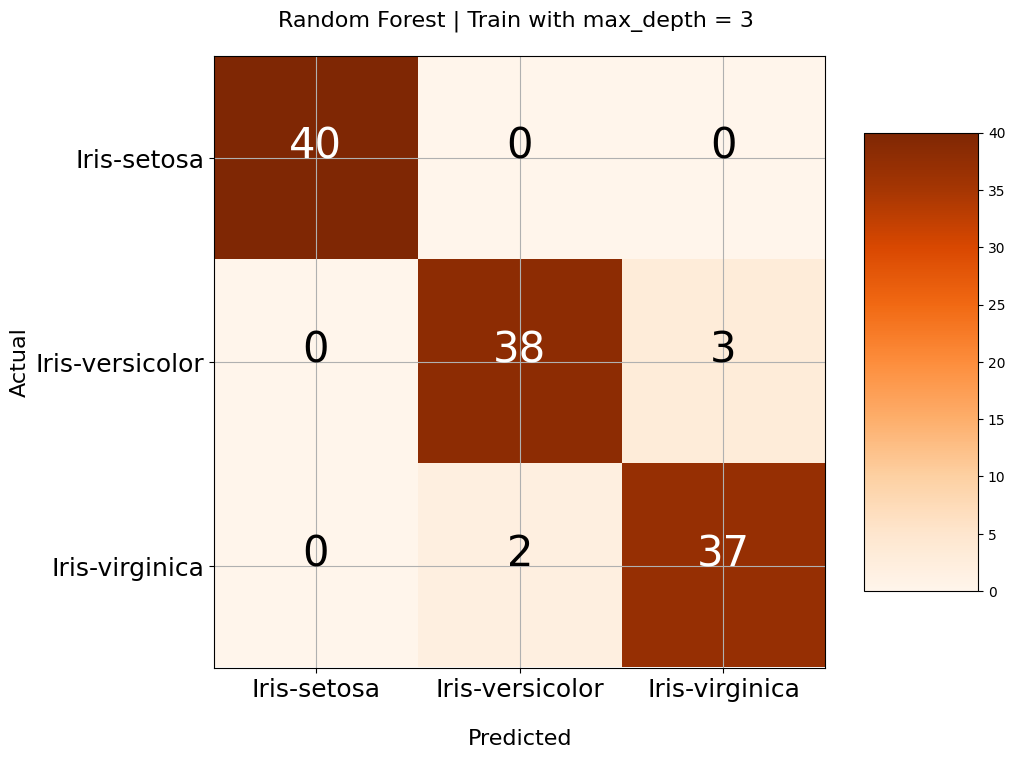

Accuracy: 95.83%


In [104]:
y_pred = model.predict(X_train)

plot_confusion_matrix(confusion_matrix(y_train, y_pred), classes=model.classes_, title=f"Random Forest | Train with {title} ", type='Train')
print(f"Accuracy: {accuracy_score(y_train, y_pred) * 100:.2f}%")

### <font color='#9ae89c'><ul style="list-style-type:circle;"><li>Test</li></ul></font>

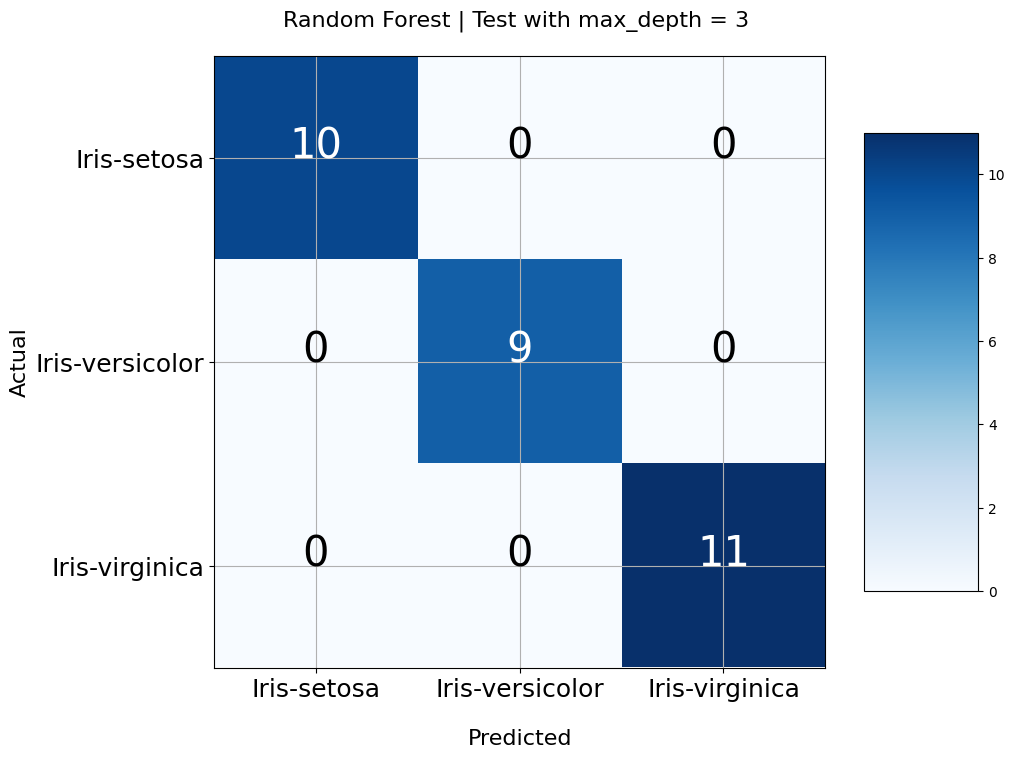

Accuracy: 100.00%


In [105]:
y_pred = model.predict(X_test)

plot_confusion_matrix(confusion_matrix(y_test, y_pred), classes=model.classes_, title=f"Random Forest | Test with {title} ", type='Test')
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")